In [21]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import pathlib
project_path = pathlib.Path().resolve().parent.parent
paths = []

import sys
path = project_path.joinpath("benchmark/third_party/bench-mr/python").as_posix()
if path not in sys.path:
    sys.path.append(path)

import os
os.environ["MPB_BINARY"] = "./benchmark"
os.environ["MPB_PYTHON_BINARY"] = "/home/evgeny/pytorch-motion-planner/scripts/run_bench_mr.py"
os.environ["MPB_PYTHON_BINARY_EMPTY"] = "/home/evgeny/pytorch-motion-planner/scripts/run_bench_mr_empty.py"
os.environ["MPB_BINARY_DIR"] = "/home/evgeny/pytorch-motion-planner/benchmark/third_party/bench-mr/bin"
os.environ["PYTHONPATH"] = "../../../../build/benchmark:" + project_path.as_posix()


import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42

from plot_env import plot_env
import json
from plot_env import plot_env, plot_env_options
from plot_trajectory import plot_trajectory, plot_nodes, plot_trajectory_options
from color import get_color, get_colors
import matplotlib.pyplot as plt
from mpb import MPB, MultipleMPB
from plot_stats import plot_planner_stats
# from Centr_shift import read_data, find_end, find_start, list_to_str, max_dist 
from Centr_shift import start_end_correction
%config InlineBackend.figure_format='retina'
import inspect

# Run one experiment

In [25]:
m = MPB()
h = 120
w = 120
m.set_random_grid_env(h, w, obstacle_ratio=0.03, seed = 10)
m["max_planning_time"] = 60
m["benchmark.planning"]['constrained_onf_planner'] = True
m.set_planners(['constrained_onf_planner'])
m.run_empty(id="corridor", runs=1)
start_end_correction(m.results_filename)
m.run(id="corridor", runs=1)

Running MPB with ID corridor (log file at corridor.log)...


corridor:   0%|          | 0/1 [00:00<?, ?it/s]

Running MPB with ID corridor (log file at corridor.log)...


corridor:   0%|          | 0/1 [00:00<?, ?it/s]

0

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


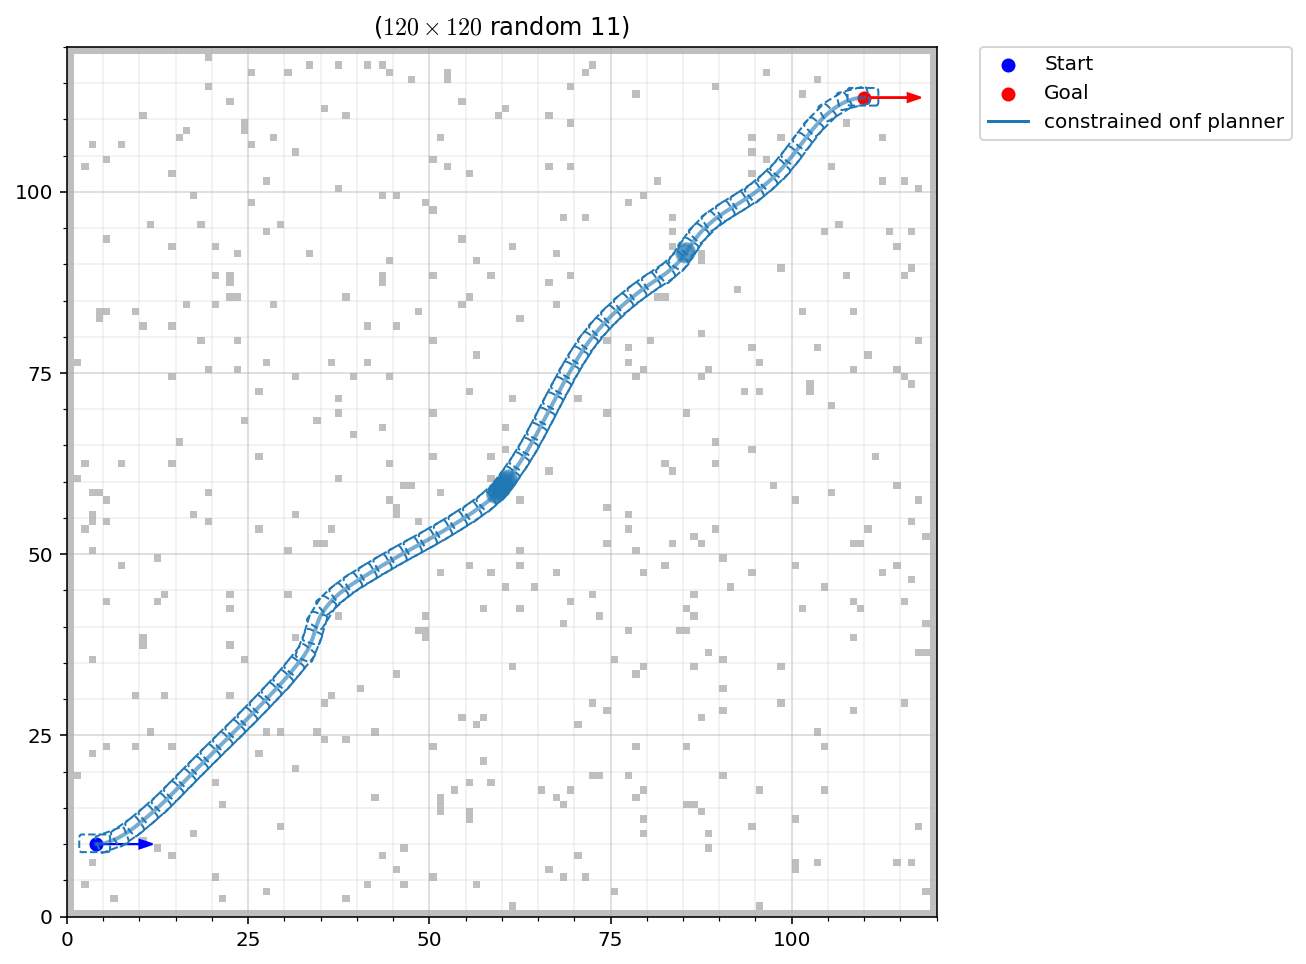

In [27]:
m.visualize_trajectories(draw_start_goal_thetas=True,
                         plot_every_nth_polygon=8,
                         fig_width=8,
                         fig_height=8,
                         silence=True,
                         save_file="plots/corridor_experiment.pdf",
                         num_colors=10)

# Run pool

In [8]:
env = os.environ
env["MPLBACKEND"] = "TkAgg"
pool = MultipleMPB()
for i in range(10):
    m = MPB()
    m.set_random_grid_env(100, 100, obstacle_ratio=0.03, seed=i + 2)
    m["max_planning_time"] = 60
    m["benchmark.planning"]['constrained_onf_planner'] = True
    m.set_planners(['constrained_onf_planner'])
    pool.benchmarks.append(m)

pool.run_parallel(id="corridor", runs=1, processes=1)

Available memory: 7.62 GB, limiting each MPB process to 62.5% usage (4.76 GB).


TypeError: can't concat str to bytes

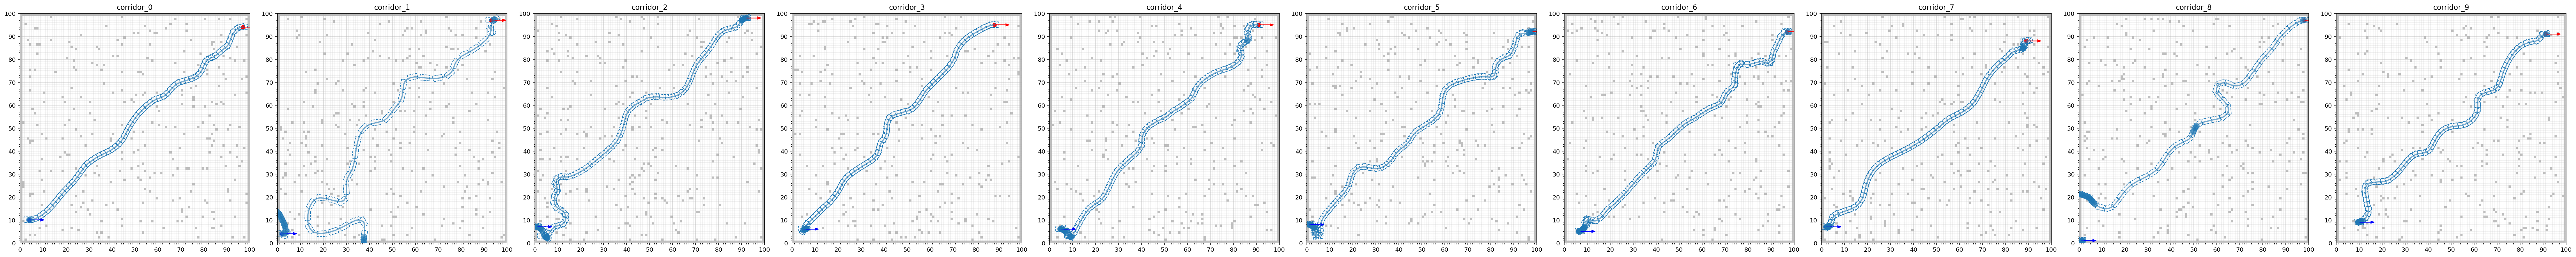

In [23]:
pool.visualize_trajectories(draw_start_goal_thetas=True,
                         plot_every_nth_polygon=8,
                         fig_width=8,
                         fig_height=8,
                         silence=True,
                         save_file="plots/forest_experiment_pool.pdf",
                         num_colors=10)

Successfully merged [corridor/corridor_0_results.json, corridor/corridor_1_results.json, corridor/corridor_2_results.json, corridor/corridor_3_results.json, corridor/corridor_4_results.json, corridor/corridor_5_results.json, corridor/corridor_6_results.json, corridor/corridor_7_results.json, corridor/corridor_8_results.json, corridor/corridor_9_results.json] into corridors_result.json.
Visualizing corridors_result.json...


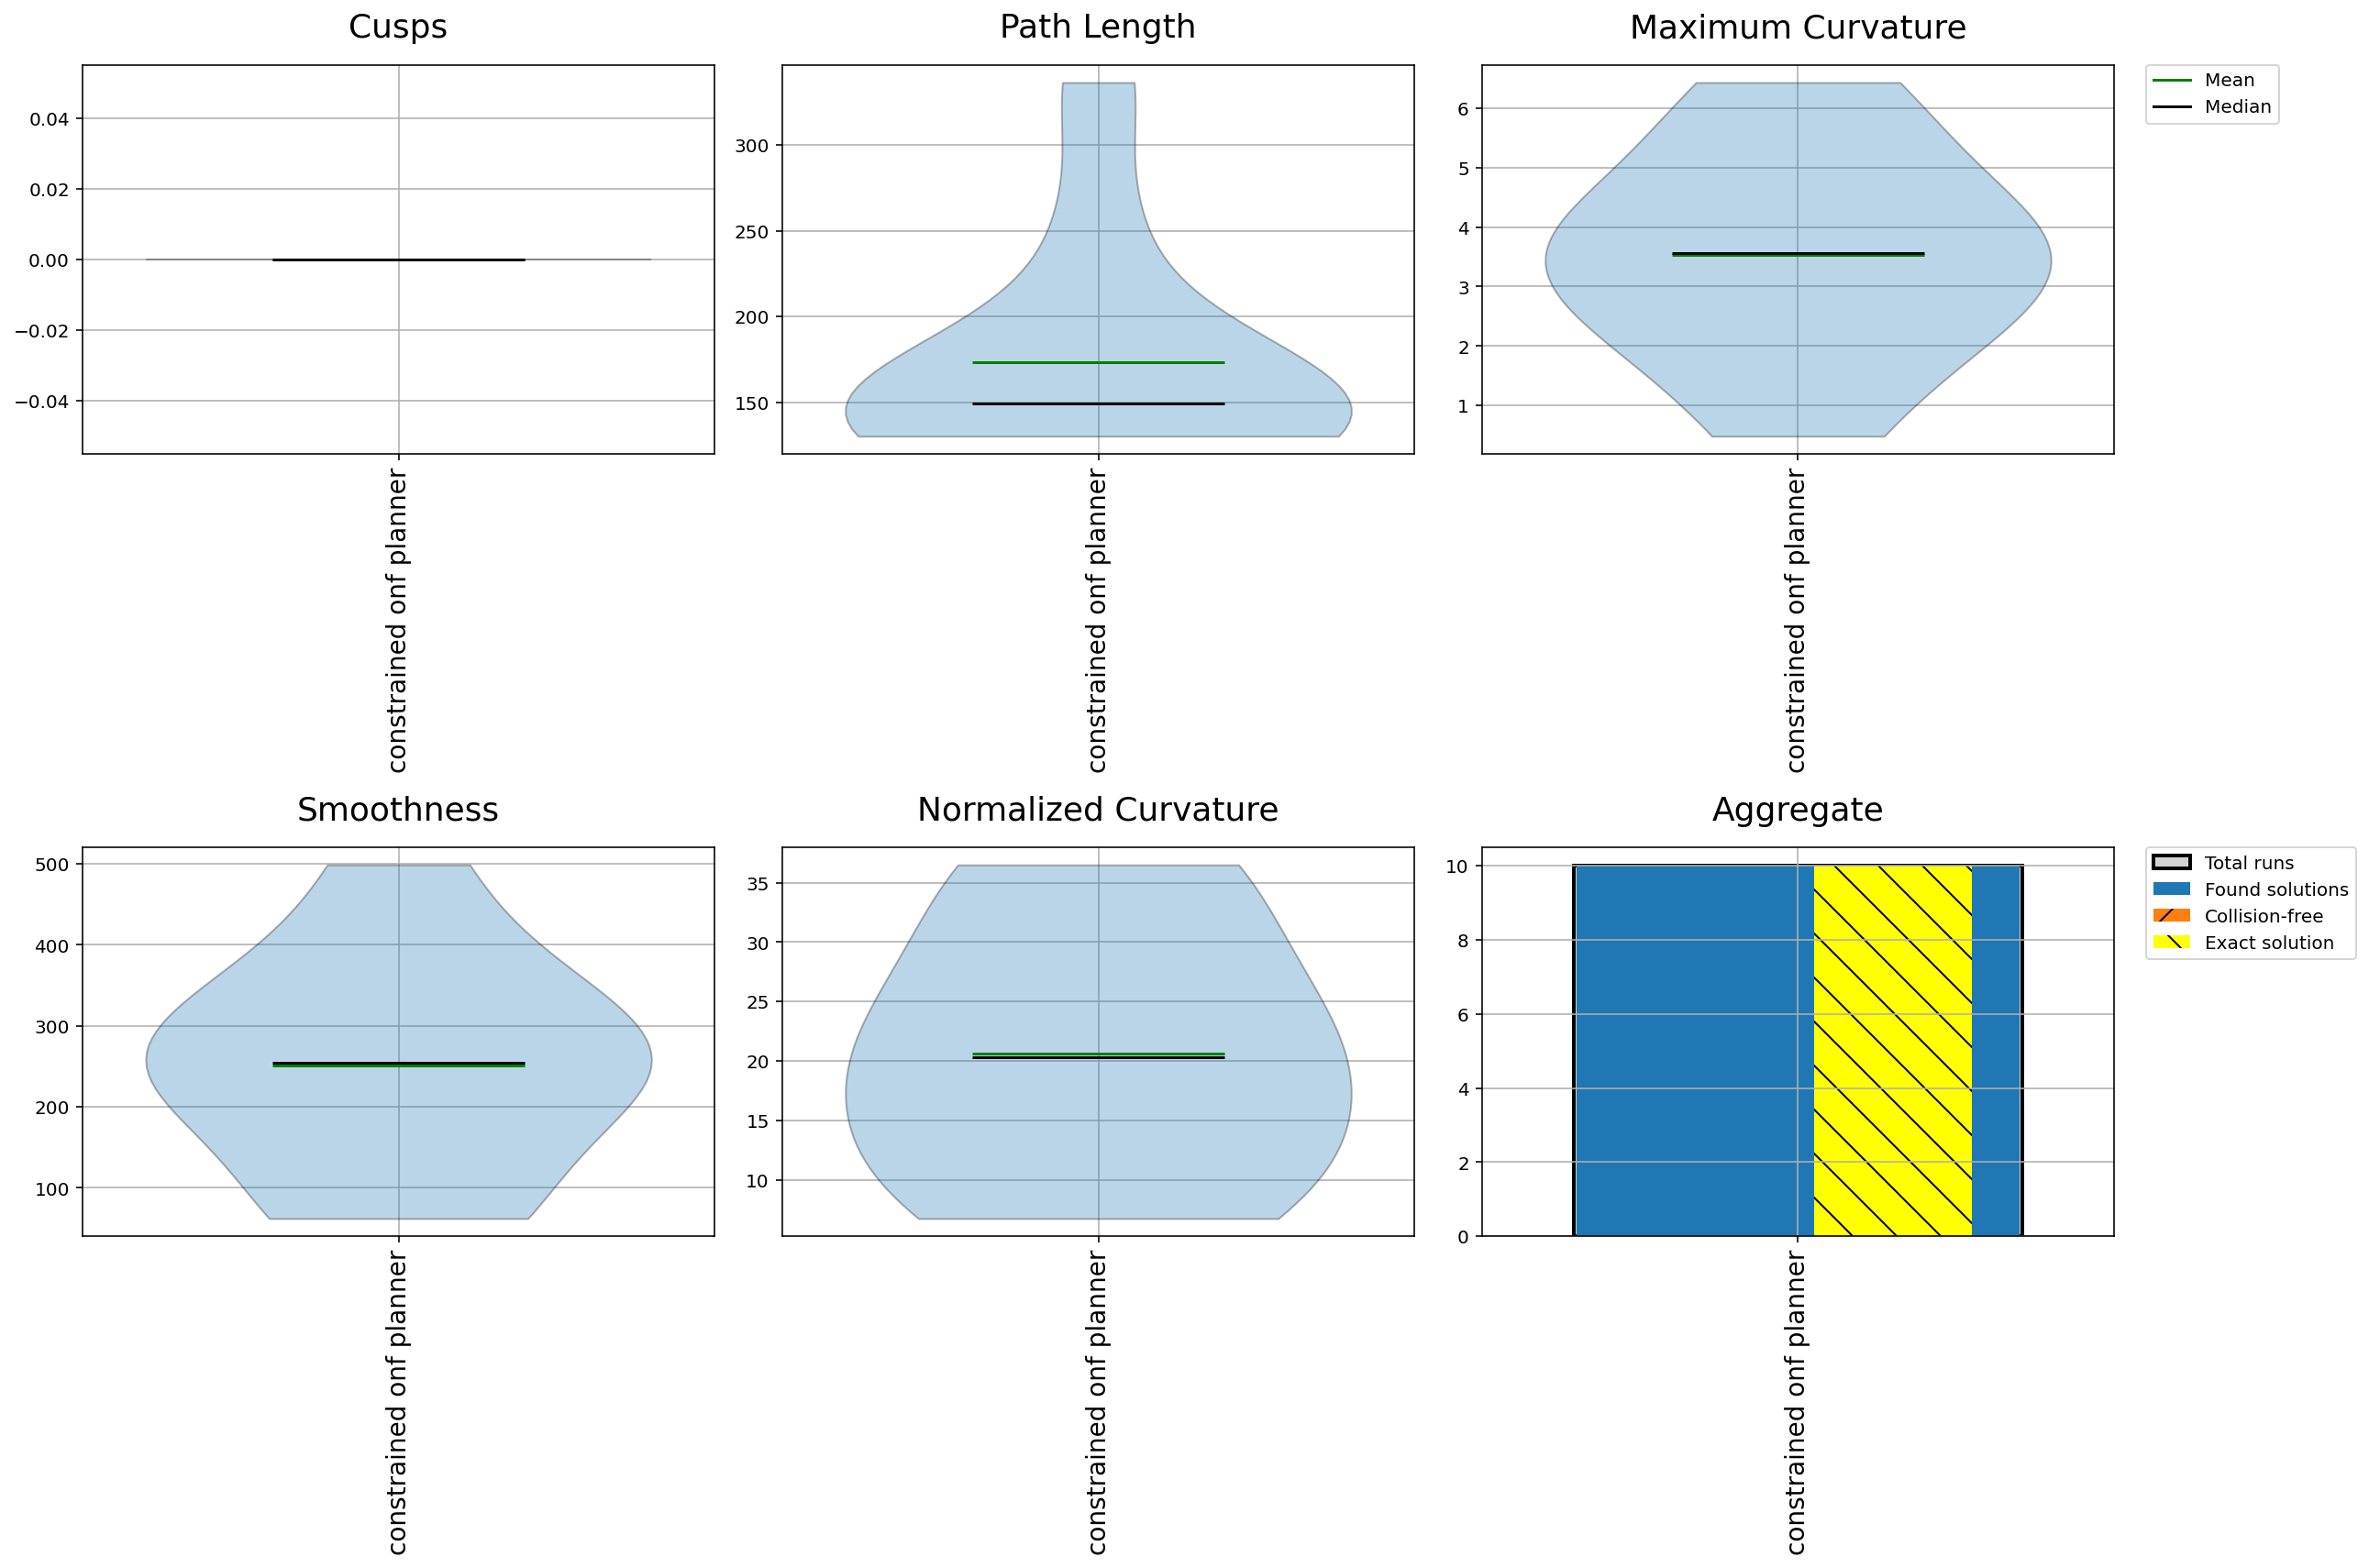

In [24]:
result = "corridors_result.json"
pool.merge(result, make_separate_runs=True)
plot_planner_stats(result, metrics="cusps, path_length, max_curvature, smoothness, normalized_curvature, aggregate")